In [1]:
import cv2
import numpy as np
from pathlib import Path

# Setup direcrtories
root = Path("/storage/vbutoi/scratch/ESE")
scratch_root = Path("/storage/vbutoi/scratch/ESE")
code_root = Path("/storage/vbutoi/projects/ESE")

# For using code without restarting.
%load_ext autoreload
%autoreload 2
# For using yaml configs.
%load_ext yamlmagic

In [2]:
from ese.experiment.datasets.utils.build_shapes import perlin_generation
import yaml 

# Load the inference cfg from local.
##################################################
cal_cfg_root = code_root / "ese" / "experiment" / "configs" / "processing"
##################################################
with open(cal_cfg_root / "synthetic.yaml", 'r') as file:
    gen_cfg = yaml.safe_load(file)

In [3]:
num_to_gen = 12

images, label_maps = perlin_generation(
    num_to_gen=num_to_gen, 
    seed=42, 
    gen_opts_cfg=gen_cfg["gen_opts"], aug_cfg=gen_cfg["aug_opts"],
)

Set seed: 42


In [4]:
img_tensor = np.stack(images)
lab_tensor = np.stack(label_maps)

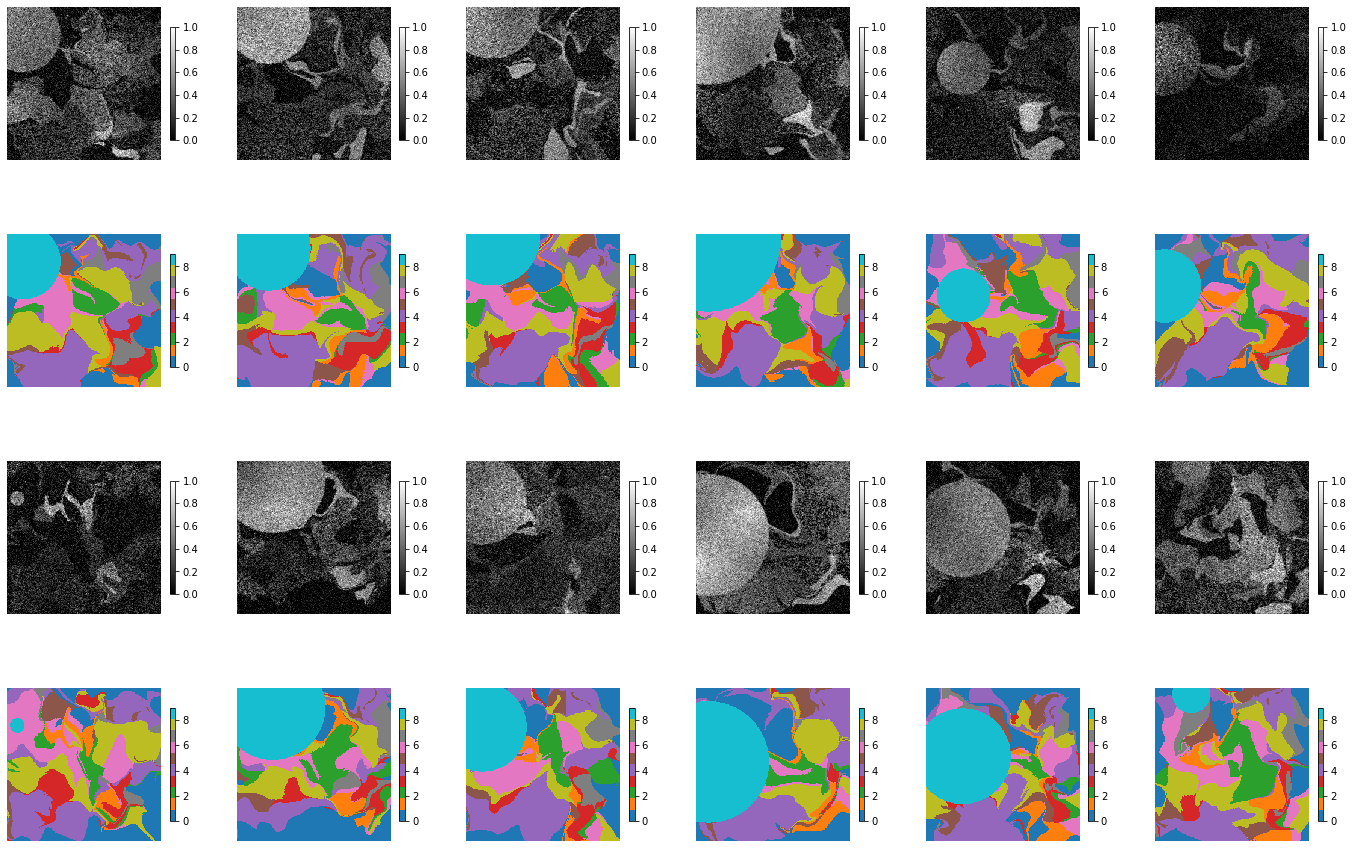

In [5]:
import matplotlib.pyplot as plt

num_cols = 6
num_rows = 2 * (num_to_gen // num_cols) 

f, axarr = plt.subplots(num_rows, num_cols, figsize=(num_cols*4, num_rows*4))
for idx in range(num_to_gen):
    row_offset = 2*(idx // num_cols)
    col_idx = idx % num_cols
    im = axarr[row_offset, col_idx].imshow(img_tensor[idx], cmap='gray', vmin=0.0, vmax=1.0, interpolation='none')
    lab = axarr[row_offset + 1, col_idx].imshow(lab_tensor[idx], cmap='tab10', interpolation='none')
    f.colorbar(im, ax=axarr[row_offset, col_idx], shrink=0.6)
    f.colorbar(lab, ax=axarr[row_offset + 1, col_idx], shrink=0.6)
    # Turn off axis lines and labels.
    axarr[row_offset, col_idx].axis('off')
    axarr[row_offset + 1, col_idx].axis('off')
plt.show()